In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gprot.summary import summarize_fits

df = summarize_fits('../results', truths='aigrain')
df.head()

,ln_A_05,ln_A_16,ln_A_50,ln_A_84,ln_A_95,ln_l_05,ln_l_16,ln_l_50,ln_l_84,ln_l_95,...,ln_sigma_84,ln_sigma_95,ln_period_05,ln_period_16,ln_period_50,ln_period_84,ln_period_95,aigrain_p_min,aigrain_p_max,aigrain_p_mean
0,-19.674894,-19.154522,-17.663051,-15.534701,-14.424018,-0.601711,-0.487261,-0.130736,0.445269,0.874366,...,-14.364028,-13.967978,1.322768,1.465259,1.787341,2.156775,2.500429,0.118834,0.665654,0.392244
1,-19.681155,-19.016712,-17.012013,-15.085878,-13.836773,-0.594285,-0.410720,0.118387,0.959641,1.604687,...,-16.785139,-15.529145,1.492209,1.687393,2.092145,2.553577,2.886728,0.504317,0.835014,0.669665
2,-12.736784,-12.648869,-12.505395,-12.360794,-12.260575,5.478327,5.641705,5.974841,6.107318,6.186240,...,-18.181302,-18.159687,2.841588,2.888304,3.050613,3.074058,3.088128,2.835564,2.835564,2.835564
3,-12.370090,-12.243328,-12.052451,-11.844526,-11.700898,9.233400,9.398853,9.623005,9.833467,9.970608,...,-16.431785,-16.410419,3.770433,3.778826,3.790203,3.802187,3.810955,3.746606,3.929346,3.837976
4,-11.183059,-11.034925,-10.774832,-10.490658,-10.288939,9.547550,9.861482,10.292702,10.732024,11.006483,...,-14.135817,-14.116854,4.018619,4.044674,4.083382,4.129561,4.162387,3.927628,4.534838,4.231233


In [33]:
from gprot.aigrain import AigrainTruths
truth = AigrainTruths().df
truth.columns

Index([u'N', u'AR', u'CLEN', u'COVER', u'LMIN', u'LMAX', u'R', u'SINI', u'PEQ',
       u'PPOL', u'A_MED', u'TAU', u'NSPOT', u'DELTA_OMEGA', u'DELTA_OMEGA_REL',
       u'OMEGA_EQ', u'OMEGA_POL', u'OMEGA_MIN', u'OMEGA_MAX', u'P_MIN',
       u'P_MAX', u'AMP', u'KID'],
      dtype='object')

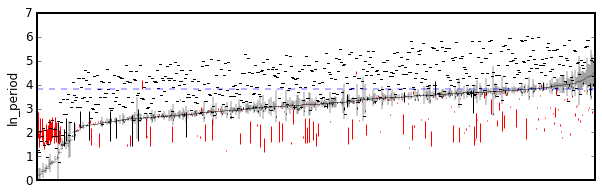

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from gprot.aigrain import AigrainTruths
truth = AigrainTruths().df

import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

inds = df.index[np.argsort(df.aigrain_p_mean)]
fig, ax = plt.subplots(1, 1, figsize=(10,3))
lines = []
labels = []
colors = []
for i,ix in enumerate(inds):
    ymin, ymax = df.ix[ix, ['aigrain_p_min', 'aigrain_p_max']]
    ymean = (ymin + ymax)/2.
    ax.plot([i,i], [ymin, ymax], color='k', alpha=0.2)
    ax.plot([i-0.5, i+1.5], [ymean, ymean], color='k', lw=1, alpha=0.2)
    tau, peq = truth.ix[ix, ['TAU', 'PEQ']]
    y_tau = np.log(tau*peq)
    ax.plot([i-0.5, i+1.5], [y_tau, y_tau], color='k', lw=1)
    
    
    ylo, yhi = df.ix[ix, ['ln_period_16', 'ln_period_84']]
    if (yhi < ymin) or (ylo > ymax):
        color='r'
    else:
        color='k'
    lines.append(([i,ylo], [i,yhi]))
    colors.append(color)
    label = '{}: AMP={:.2e}'.format(ix, truth.ix[ix, 'AMP'])
    labels.append(label)

collection = LineCollection(lines, colors=colors, linewidths=1)
ax.add_collection(collection)
ax.set_xlim((-0.5, i+0.5))
ax.set_xticks([]);
ax.set_ylabel('ln_period');
ax.plot([-0.5, i+0.5], [np.log(45), np.log(45)], ls='--', color='b', alpha=0.3);

tooltip = mpld3.plugins.PointLabelTooltip(collection, labels=labels)
plugins.connect(fig, tooltip)

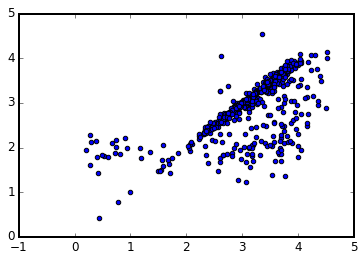

In [35]:
fig, ax = plt.subplots(1,1)
points = ax.scatter(df.aigrain_p_mean, df.ln_period_50)
tooltip = mpld3.plugins.PointLabelTooltip(points, labels=[i for i in df.index])
plugins.connect(fig, tooltip)

In [28]:
i = 279
print(np.log(truth.ix[i, ['P_MIN','P_MAX']]))
print(df.ix[i, ['ln_period_16', 'ln_period_84']])

P_MIN    3.905804
P_MAX    3.905804
Name: 279, dtype: float64
ln_period_16    2.601855
ln_period_84    2.651217
Name: 279, dtype: float64


In [30]:
np.exp(3.906)

49.699754825406366

In [31]:
from gprot.lc import qtr_times
qtr_times

,tstart,tstop
q,,
1,131.511880,164.983257
2,169.518900,258.466998
3,260.223736,349.494411
4,352.376612,442.202053
5,443.489554,538.161241
6,539.449771,629.295934
7,630.174122,719.547036
8,735.362357,802.343677
9,808.515159,905.926044
